In [1]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# In this notebook, we will implement a logistic regression model and train it using PyTorch.

### First let's do some prereqs

In [2]:
# This is how we create models using PyTorch
class model_net(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(2, 1)
    
    def forward(self, x):
        pred = torch.sigmoid(self.linear(x))
        return pred

In [3]:
# model isntance
model = model_net()

# optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [4]:
# training:
# for epoch in range(num_of_epochs):
#   for x, y in train_loader:
#       output = model(x)
#       loss = criterion(output, y)
#       optomizer.zero_grad()
#       loss.backward()
#       optimizer.step()

This is ready linear functions in PyTorch. We will use it to build a logistic regression model.

In [5]:
linear = nn.Linear(2, 1, bias=True)

In [6]:
print('Weights:', linear.weight)
print('Bias:', linear.bias)

Weights: Parameter containing:
tensor([[-0.3147,  0.6301]], requires_grad=True)
Bias: Parameter containing:
tensor([-0.0805], requires_grad=True)


In [7]:
# single training example
x = torch.tensor([[1.0, -1.0]])
x

tensor([[ 1., -1.]])

In [8]:
w = linear.weight.detach()
b = linear.bias.detach()
z = torch.matmul(x, w.T) + b
z

tensor([[-1.0253]])

In [9]:
# Also we could have don just done:
z = linear(x)
z

tensor([[-1.0253]], grad_fn=<AddmmBackward0>)

In [10]:
# What about mini batches?
x = torch.rand(10, 2)
x

tensor([[0.8962, 0.1000],
        [0.0439, 0.1715],
        [0.9307, 0.9377],
        [0.7315, 0.9405],
        [0.2030, 0.2655],
        [0.1261, 0.8811],
        [0.1910, 0.5646],
        [0.0159, 0.5677],
        [0.2066, 0.2643],
        [0.8965, 0.6934]])

In [11]:
y_preds = torch.matmul(x, w.T) + b
y_preds

tensor([[-0.2996],
        [ 0.0137],
        [ 0.2174],
        [ 0.2818],
        [ 0.0229],
        [ 0.4349],
        [ 0.2151],
        [ 0.2721],
        [ 0.0209],
        [ 0.0742]])

In [12]:
y_preds = linear(x)
y_preds

tensor([[-0.2996],
        [ 0.0137],
        [ 0.2174],
        [ 0.2818],
        [ 0.0229],
        [ 0.4349],
        [ 0.2151],
        [ 0.2721],
        [ 0.0209],
        [ 0.0742]], grad_fn=<AddmmBackward0>)

# Now we are ready to build our model and train it

# Dataset

In [13]:
df = pd.read_csv("perceptron_toydata-truncated.txt", sep="\t")
X_train = df[["x1", "x2"]].values
y_train = df["label"].values

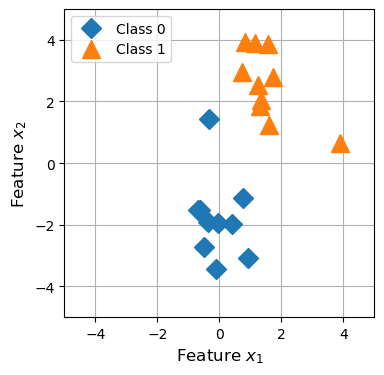

In [14]:
plt.figure(figsize=(4, 4))
plt.plot(
    X_train[y_train == 0, 0],
    X_train[y_train == 0, 1],
    marker="D",
    markersize=10,
    linestyle="",
    label="Class 0",
)

plt.plot(
    X_train[y_train == 1, 0],
    X_train[y_train == 1, 1],
    marker="^",
    markersize=13,
    linestyle="",
    label="Class 1",
)

plt.legend(loc=2)

plt.xlim([-5, 5])
plt.ylim([-5, 5])

plt.xlabel("Feature $x_1$", fontsize=12)
plt.ylabel("Feature $x_2$", fontsize=12)

plt.grid()
plt.show()

Standardization

In [15]:
X_train = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0)

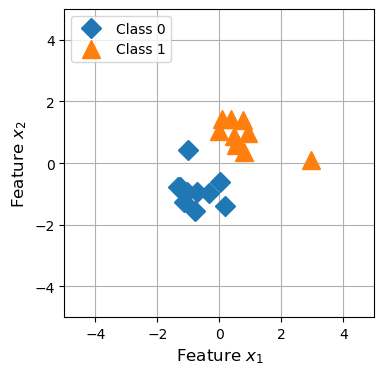

In [16]:
plt.figure(figsize=(4, 4))
plt.plot(
    X_train[y_train == 0, 0],
    X_train[y_train == 0, 1],
    marker="D",
    markersize=10,
    linestyle="",
    label="Class 0",
)

plt.plot(
    X_train[y_train == 1, 0],
    X_train[y_train == 1, 1],
    marker="^",
    markersize=13,
    linestyle="",
    label="Class 1",
)

plt.legend(loc=2)

plt.xlim([-5, 5])
plt.ylim([-5, 5])

plt.xlabel("Feature $x_1$", fontsize=12)
plt.ylabel("Feature $x_2$", fontsize=12)

plt.grid()
plt.show()

### Implementing model

In [17]:
class LogisticRegressionTorch(nn.Module):
    def __init__(self, num_features):
        super().__init__()
        self.linear = nn.Linear(num_features, 1)
    
    def forward(self, x):
        # logits = self.linear(x)
        pred = torch.sigmoid(self.linear(x))
        return pred

In [18]:
torch.manual_seed(1)
model = LogisticRegressionTorch(num_features = 2)

In [19]:
x = torch.rand(1,2)

# torch.no_grad() is used to prevent gradient calculation. It doesn't construct the computation graph and therefore
# reduces memory usage and speeds up computation.

with torch.no_grad():
    pred = model(x)

print(pred)

tensor([[0.5303]])


### Defining a DataLoader

In [20]:
from torch.utils.data import Dataset, DataLoader

In [21]:
class MyDataset(Dataset):
    def __init__(self, X, y):
        self.features = torch.tensor(X, dtype=torch.float32)
        self.labels = torch.tensor(y, dtype=torch.float32)
    
    def __getitem__(self, index):
        return self.features[index], self.labels[index]
    
    def __len__(self):
        return len(self.features)


train_ds = MyDataset(X_train, y_train)

train_loader = DataLoader(
    train_ds,
    batch_size=10,
    shuffle=True
)

In [22]:
for x, y in train_loader:
    print(x)
    print(y)
    

tensor([[-0.0071,  1.0363],
        [ 0.8023,  0.3434],
        [-1.1552, -1.2639],
        [ 0.9341,  0.9678],
        [ 2.9575,  0.1017],
        [-1.3340, -0.7724],
        [-0.7882, -1.5418],
        [ 0.0306, -0.6194],
        [ 0.4635,  0.8631],
        [ 0.7741,  1.3908]])
tensor([1., 1., 0., 1., 1., 0., 0., 0., 1., 1.])
tensor([[-0.7411, -0.9457],
        [ 0.1623, -1.3968],
        [-1.2870, -0.7765],
        [-1.0423, -0.9295],
        [ 0.0871,  1.4270],
        [ 0.5388,  0.5851],
        [ 0.5576,  0.6576],
        [-1.0046,  0.4200],
        [-0.3270, -0.9618],
        [ 0.3788,  1.4150]])
tensor([0., 0., 0., 0., 1., 1., 1., 0., 0., 1.])


### Training

In [23]:
import torch.nn.functional as F

torch.manual_seed(1)
model = LogisticRegressionTorch(num_features=2)
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)

num_epochs = 50

for epoch in range(num_epochs):
    model.train()
    print(f"Epoch {epoch+1}/{num_epochs}:")
    for batch_idx, (features, labels) in enumerate(train_loader):
        outputs = model(features)
        loss = F.binary_cross_entropy(outputs, labels.view(-1, 1))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # print(f'Epoch: {epoch+1:03d}/{num_epochs:03d}'
        #        f' | Batch {batch_idx:03d}/{len(train_loader):03d}'
        #        f' | Loss: {loss:.2f}')
        print(f"\tBatch {batch_idx+1}/{len(train_loader)} | Loss: {loss.item():.4f}")

Epoch 1/50:
	Batch 1/2 | Loss: 0.6715
	Batch 2/2 | Loss: 0.7326
Epoch 2/50:
	Batch 1/2 | Loss: 0.6721
	Batch 2/2 | Loss: 0.6694
Epoch 3/50:
	Batch 1/2 | Loss: 0.5999
	Batch 2/2 | Loss: 0.6830
Epoch 4/50:
	Batch 1/2 | Loss: 0.6930
	Batch 2/2 | Loss: 0.5362
Epoch 5/50:
	Batch 1/2 | Loss: 0.6091
	Batch 2/2 | Loss: 0.5694
Epoch 6/50:
	Batch 1/2 | Loss: 0.5860
	Batch 2/2 | Loss: 0.5447
Epoch 7/50:
	Batch 1/2 | Loss: 0.5133
	Batch 2/2 | Loss: 0.5764
Epoch 8/50:
	Batch 1/2 | Loss: 0.5115
	Batch 2/2 | Loss: 0.5354
Epoch 9/50:
	Batch 1/2 | Loss: 0.5130
	Batch 2/2 | Loss: 0.4932
Epoch 10/50:
	Batch 1/2 | Loss: 0.5342
	Batch 2/2 | Loss: 0.4357
Epoch 11/50:
	Batch 1/2 | Loss: 0.4152
	Batch 2/2 | Loss: 0.5219
Epoch 12/50:
	Batch 1/2 | Loss: 0.4614
	Batch 2/2 | Loss: 0.4426
Epoch 13/50:
	Batch 1/2 | Loss: 0.4560
	Batch 2/2 | Loss: 0.4182
Epoch 14/50:
	Batch 1/2 | Loss: 0.4115
	Batch 2/2 | Loss: 0.4345
Epoch 15/50:
	Batch 1/2 | Loss: 0.4295
	Batch 2/2 | Loss: 0.3900
Epoch 16/50:
	Batch 1/2 | Loss: 0.

In [24]:
probas = model(torch.from_numpy(X_train).to(torch.float32))
preds = torch.where(probas >= 0.5, 1., 0.)
preds

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]])

In [25]:
def compute_accuracy(model, dataloader):
    model.eval()
    correct_preds, num_examples = 0, 0

    for features, labels in dataloader:
        with torch.no_grad():
            probas = model(features)
        
        preds = torch.where(probas >= 0.5, 1., 0.)
        true_preds = labels.view(-1, 1).to(torch.float32)

        correct_preds += torch.sum(preds == true_preds)
        num_examples += len(features)
    
    return correct_preds / num_examples     


In [26]:
train_acc = compute_accuracy(model, train_loader)
print('Training accuracy: {}%'.format(train_acc*100))

Training accuracy: 100.0%


### Plotting the decision boundary

In [27]:
model.linear.weight

Parameter containing:
tensor([[1.1856, 0.9511]], requires_grad=True)

In [28]:
def plot_boundary(model):
    w1 = model.linear.weight[0][0].detach().item()
    w2 = model.linear.weight[0][1].detach().item()
    b = model.linear.bias.detach().item()

    x1_min = -20
    x2_min = -(b + w1 * x1_min) / w2

    x1_max = 20
    x2_max = -(b + w1 * x1_max) / w2

    return x1_min, x2_min, x1_max, x2_max

-20 24.982013233285397 20 -24.881857432190394


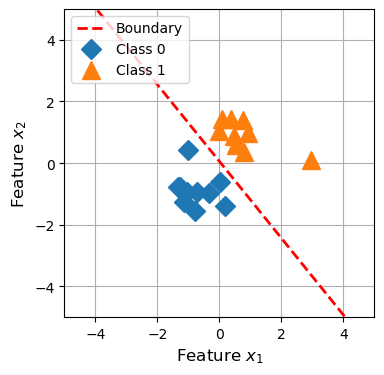

In [29]:
plt.figure(figsize=(4, 4))

x1_min, x2_min, x1_max, x2_max = plot_boundary(model)
print(x1_min, x2_min, x1_max, x2_max)

plt.plot([x1_min, x1_max], [x2_min, x2_max], "r--", linewidth=2, label="Boundary")

plt.plot(
    X_train[y_train == 0, 0],
    X_train[y_train == 0, 1],
    marker="D",
    markersize=10,
    linestyle="",
    label="Class 0",
)

plt.plot(
    X_train[y_train == 1, 0],
    X_train[y_train == 1, 1],
    marker="^",
    markersize=13,
    linestyle="",
    label="Class 1",
)

plt.legend(loc=2)

plt.xlim([-5, 5])
plt.ylim([-5, 5])

plt.xlabel("Feature $x_1$", fontsize=12)
plt.ylabel("Feature $x_2$", fontsize=12)

plt.grid()

plt.show()